# Tutorial on the Fluorescence Dataset
This notebook illustrates how to get started with the fluorescence dataset, providing a walkthrough of its structure.

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# From the repository of the dataset, we import the function that
# loads the fluorescence dataset
from src.load_dataset import load_fluorescence

## Loading the Dataset

The function may load the dataset in a number of ways. You can always refer to the documentation to see the options available. Besides hovering over the function's name, you can do `help(load_fluorescence)` to get the docstring content, `load_fluorescence?` to also get the signature and location of the function, and `load_fluorescence??` to additionally show the source code.

Let's try `load_fluorescence?` to get the fuction's signature, docstring, location, and type.

In [2]:
load_fluorescence?

Signature:
load_fluorescence(
    directory: str,
    as_frame: bool = False,
    as_dict: bool = False,
) -> sklearn.utils._bunch.Bunch
Docstring:
Loads fluorescence data and histological images and labels from the
specified directory and returns it as a Bunch object.

Parameters
----------
directory : str
    The root directory containing the .dat files with the fluorescence
    data.
as_frame : bool, default=False
    If True, Bunch includes data as a pandas DataFrame
as_dict : bool, default=False
    If True, Bunch includes images in a dictionary of 3D NumPy arrays,
    with keys corresponding to diet, mouse, and take.

Returns
-------
dataset : Bunch
    A Bunch object containing:
        - DESCR: A string description of the dataset.
        - diet_names: A list of diet names where the index of each element
            was used in `diet` instead of the string, i.e., '0' was used
            instead of diet_names[0], which is 'control'.
        - diet_map: A dictionary mapping inte

Say, for instance, that we want to load the dataset with the default options. For this, we do the following.

In [3]:
# We use our function imported from the module
directory = 'data'
dataset = load_fluorescence(directory)

The `load_fluorescence` function follows the conventions fixed by `scikit-learn`, thus returning a `Bunch` object containing the dataset.

In [4]:
type(dataset)

sklearn.utils._bunch.Bunch

This object also supports conventional attributes, such as `Bunch.DESCR` with a description of the dataset that acts as integrated documentation.

In [5]:
print(dataset.DESCR)



    Fluorescence Dataset


    Summary
    -------

    This dataset contains fluorescence images for elemental composition
    analysis of mammary gland adenocarcinomas in mice, and images from the
    histological analysis. It contains various mouse samples, each with a
    specific diet, measured at least once. Different measurements of the same
    mouse are indexed by the 'take' attribute. The dataset is structured as a
    `scikit-learn` `Bunch` object, and can optionally include a pandas
    DataFrame with pixels as rows and their data (row, column, mouse, take,
    diet, fluorescence for each element, type of tissue) as columns.


    Experimental Methodology
    ------------------------

    An experimental model was implemented in BALB/C mice through the
    subcutaneous inoculation of transplantable mammary gland adenocarcinoma
    cells. The mice were divided into three dietary groups: one rich in
    omega-3, another rich in omega-6, and a control group without lipid
   

## Exploring the Dataset Structure

Currently, `dataset` was loaded with the default options, i.e., `as_dict=False` and `as_frame=False`. This implies that attributes of the dataset are loaded as NumPy arrays or lists.

In [6]:
dataset.diet

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
dataset.diet_names

['control', 'omega3', 'omega6']

In [8]:
dataset.mouse

array([20, 16, 21, 19, 18, 25, 14, 15, 26, 25, 17, 23, 32, 35, 28, 33, 29,
       27, 38, 30, 36, 31, 39, 37,  6,  9, 12,  4, 11,  7,  1, 12, 10,  8,
        1, 10,  2])

In [9]:
dataset.element_order

['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']

In [10]:
dataset.images

[array([[[8.45505e+07, 3.54533e+06, 3.91944e+07, ..., 0.00000e+00,
          0.00000e+00, 0.00000e+00],
         [8.18005e+07, 8.27401e+06, 3.88813e+07, ..., 0.00000e+00,
          0.00000e+00, 3.62058e+06],
         [1.33648e+08, 0.00000e+00, 8.08340e+07, ..., 0.00000e+00,
          0.00000e+00, 0.00000e+00],
         ...,
         [1.00531e+09, 3.36256e+06, 1.13139e+08, ..., 6.92797e+06,
          2.62664e+07, 4.22752e+07],
         [1.13831e+09, 4.90009e+06, 1.05748e+08, ..., 9.55944e+06,
          3.17000e+07, 5.29787e+07],
         [1.20135e+09, 1.80691e+07, 8.71623e+07, ..., 1.47344e+07,
          3.14599e+07, 4.76245e+07]],
 
        [[7.80501e+07, 9.39189e+06, 3.87514e+07, ..., 0.00000e+00,
          0.00000e+00, 1.82731e+06],
         [1.07569e+08, 2.21679e+06, 3.19941e+07, ..., 0.00000e+00,
          0.00000e+00, 5.30936e+06],
         [1.44314e+08, 2.20779e+06, 6.29134e+07, ..., 0.00000e+00,
          0.00000e+00, 0.00000e+00],
         ...,
         [1.08470e+09, 1.03490e+0

In [11]:
len(dataset.images)==len(dataset.take)==len(dataset.diet)==len(dataset.mouse)

True

Note that the dataset description specified that:
> if `as_dict` is False, that means that `images[n][0]` is the 2D image for the fluorescence of `element_order[0]`, which is `'Ca'`, of `mouse[n]`, `take[n]` with `diet[n]`.

In [12]:
sample_number = 3
element_number = 0

print(f"Take {dataset.take[sample_number]} of mouse {dataset.mouse[sample_number]}, whose diet was {dataset.diet[sample_number]},")
print(f"had the fluorescence of {dataset.element_order[element_number]} shown in image \n\n{dataset.images[sample_number][element_number]}.")

Take 0 of mouse 19, whose diet was 2,
had the fluorescence of Ca shown in image 

[[8.97795e+07 7.01772e+06 3.69797e+07 0.00000e+00 1.35454e+07 0.00000e+00
  0.00000e+00 4.36266e+06]
 [9.62373e+07 1.33435e+06 5.27412e+07 8.73960e+06 1.32330e+07 0.00000e+00
  0.00000e+00 0.00000e+00]
 [1.02116e+08 1.59584e+06 1.41250e+08 0.00000e+00 6.74300e+06 0.00000e+00
  0.00000e+00 0.00000e+00]
 [8.71832e+07 0.00000e+00 6.34050e+07 0.00000e+00 1.09924e+07 0.00000e+00
  0.00000e+00 3.52833e+06]
 [9.54526e+07 2.11576e+06 5.27856e+07 0.00000e+00 1.17560e+07 0.00000e+00
  0.00000e+00 1.93731e+06]
 [9.82266e+07 1.96892e+06 9.06882e+07 0.00000e+00 2.06345e+07 0.00000e+00
  0.00000e+00 4.97332e+06]
 [1.19631e+08 2.21586e+06 6.11298e+07 0.00000e+00 1.43851e+07 0.00000e+00
  0.00000e+00 1.65648e+06]
 [1.29402e+08 2.02559e+05 7.74608e+07 0.00000e+00 1.32951e+07 0.00000e+00
  0.00000e+00 0.00000e+00]
 [1.60609e+08 2.73681e+06 5.25125e+07 0.00000e+00 1.30368e+07 0.00000e+00
  0.00000e+00 3.90246e+06]
 [2.12530

Note that not all images have the same size.

In [13]:
for image in dataset.images:
    print(image.shape)

(21, 21, 8)
(51, 51, 8)
(51, 26, 8)
(51, 56, 8)
(61, 61, 8)
(51, 51, 8)
(101, 101, 8)
(101, 101, 8)
(51, 51, 8)
(51, 51, 8)
(82, 81, 8)
(93, 81, 8)
(51, 51, 8)
(51, 51, 8)
(118, 121, 8)
(51, 51, 8)
(51, 51, 8)
(51, 51, 8)
(41, 41, 8)
(51, 51, 8)
(87, 31, 8)
(46, 51, 8)
(101, 101, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(51, 51, 8)
(101, 101, 8)
(51, 51, 8)
(48, 68, 8)
(51, 51, 8)
(101, 101, 8)


## Dataset Images

We have three types of images in the dataset: fluorescence images, which contain the fluorescence for different elements; histological images, which are the optical images taken through a microscope after staining, and are the ones used by the expert to label tissue types; and label images, which contain the labels indicating the type of tissue.

### Fluorescence Images
All samples have fluorescence images for all elements. We can access them using the `dataset.images` attribute.

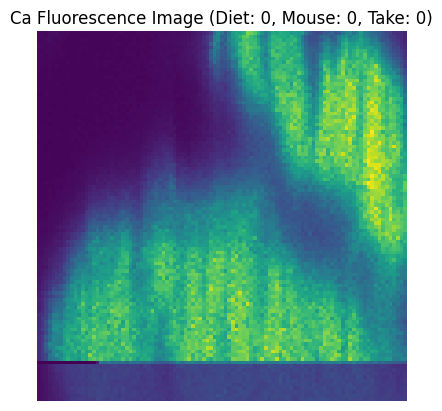

In [14]:
# Selecting a case
# Let's see where dataset.hist_img is not none
not_none_indexes = [i for i, img in enumerate(dataset.hist_img) if img is not None]

# Retrieve the image from the dataset
m = 2
image = dataset.images[not_none_indexes[m]]

# Selecting an element
element_number = 0

# Display the image
if image is not None:
    # Display the image
    plt.imshow(image[:,:,element_number])
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"{dataset.element_order[element_number]} Fluorescence Image (Diet: {dataset.diet[not_none_indexes[m]]}, Mouse: {dataset.diet[not_none_indexes[m]]}, Take: {dataset.take[not_none_indexes[m]]})")
    plt.show()
else:
    print("No image found for the specified key).")

### Histological Images
We can access the histological images through the `dataset.hist_img` array. As mentioned above, these images are the optical images taken after staining, and are the ones used by the expert to label tissue types. Note that these images are not available for most of the samples.

In [15]:
# Let's see where dataset.hist_img is not none
not_none_indexes = [i for i, img in enumerate(dataset.hist_img) if img is not None]
print(f'Indexes of not None elements: {not_none_indexes}')


Indexes of not None elements: [12, 27, 36]


In [16]:
n = not_none_indexes[2]

print(f'Mouse: {dataset.mouse[n]}')
print(f'Take: {dataset.take[n]}')
print(f'Diet: {dataset.diet[n]}')
print(f'Hitology image shape: {dataset.hist_img[n].shape}')

type(dataset.hist_img[n])

Mouse: 2
Take: 0
Diet: 0
Hitology image shape: (257, 268, 3)


numpy.ndarray

In [17]:
len(dataset.hist_img)

37

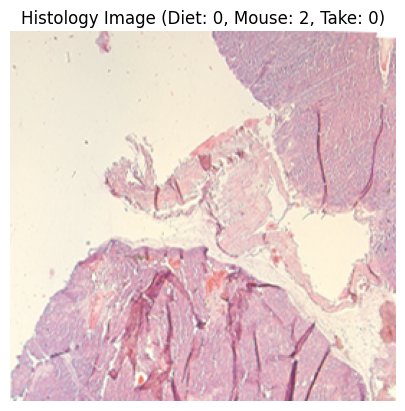

In [18]:
# Retrieve the image from the dataset
m = 2
image = dataset.hist_img[not_none_indexes[m]]

if image is not None:
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Histology Image (Diet: {dataset.diet[not_none_indexes[m]]}, Mouse: {dataset.mouse[not_none_indexes[m]]}, Take: {dataset.take[not_none_indexes[m]]})")
    plt.show()
else:
    print("No image found for the specified key).")


### Label Images
As stated previously, this are the images that indicate the tissue type. Also note that we do not have labels for all images. In fact, since they require manual labeling by an expert, labels are quite scarce.

In [19]:
# Let's see where dataset.hist_img_labels is not none
not_none_label_indexes = [i for i, img in enumerate(dataset.hist_img_labels) if img is not None]
print(f'Indexes of not None elements: {not_none_label_indexes}')

Indexes of not None elements: [12, 27, 36]


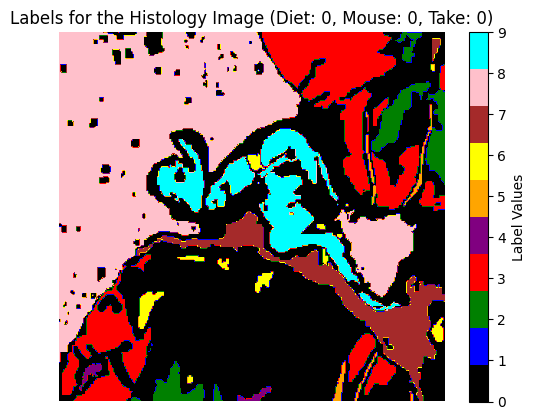

In [20]:
# Define a custom colormap for 0-9
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)

# Retrieve the labeled image from the dataset
m = 2
labels_image = dataset.hist_img_labels[not_none_label_indexes[m]]

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Labels for the Histology Image (Diet: {dataset.diet[not_none_label_indexes[m]]}, Mouse: {dataset.diet[not_none_label_indexes[m]]}, Take: {dataset.take[not_none_label_indexes[m]]})")
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key.")



## Alternative Dataset Loading Methods

### As Dictionary
Remember that you can always load the dataset with images as values of dictionaries whose keys are the tuples `(diet, mouse, take)`. 

In [21]:
dataset_dict = load_fluorescence(directory, as_dict=True)

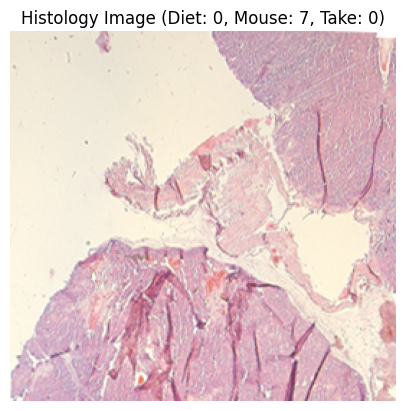

In [22]:
# Retrieve the image from the dataset
image = dataset_dict.hist_img.get((0, 2, 0))

if image is not None:
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.show()
else:
    print("No image found for the specified key (0, 7, 0).")

### As a `pandas.DataFrame`
One can define many machine learning tasks for which it's useful to have a dataframe where instead of having images as units of data, we have individual pixels as datapoints, with fluorescence values as attributes. Since this implies quite a cumbersome transformation, we provide this dataframe as a `frame` attribute when loading the dataset with `as_frame=True`.

In [23]:
directory = 'data'
fluorescence = load_fluorescence(directory, as_frame=True)
df = fluorescence.frame
df.head()

,diet,mouse,take,row,col,Ca,Cu,Fe,K,Mn,P,S,Zn,label
0,2,20,0,0,0,84550500.0,3545330.0,39194400.0,0.0,20321500.0,0.0,0.0,0.0,NaN
1,2,20,0,0,1,81800500.0,8274010.0,38881300.0,6844710.0,8308350.0,0.0,0.0,3620580.0,NaN
2,2,20,0,0,2,133648000.0,0.0,80834000.0,0.0,17920100.0,0.0,0.0,0.0,NaN
3,2,20,0,0,3,133251000.0,0.0,41295900.0,0.0,14354700.0,0.0,0.0,0.0,NaN
4,2,20,0,0,4,165578000.0,11115900.0,48933600.0,0.0,10437200.0,0.0,0.0,5360040.0,NaN


Now, you can inspect `df` as with any other `DataFrame`.

In [24]:
df.shape

(175211, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175211 entries, 0 to 175210
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   diet    175211 non-null  category
 1   mouse   175211 non-null  int64   
 2   take    175211 non-null  int64   
 3   row     175211 non-null  int64   
 4   col     175211 non-null  int64   
 5   Ca      175211 non-null  float64 
 6   Cu      175211 non-null  float64 
 7   Fe      175211 non-null  float64 
 8   K       175211 non-null  float64 
 9   Mn      175211 non-null  float64 
 10  P       175211 non-null  float64 
 11  S       175211 non-null  float64 
 12  Zn      175211 non-null  float64 
 13  label   23003 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 16.4 MB


In [26]:
df['diet'].value_counts()

diet
0    72476
2    53325
1    49410
Name: count, dtype: int64

In [27]:
df['mouse'].unique()

array([20, 16, 21, 19, 18, 25, 14, 15, 26, 17, 23, 32, 35, 28, 33, 29, 27,
       38, 30, 36, 31, 39, 37,  6,  9, 12,  4, 11,  7,  1, 10,  8,  2])

## Transformed Label Images
Since labels are obtained from the histological images, they do not originally have the size not the resolution of the fluorescence images (which is the limitting factor). Thus, we have to align the images, resize them, and downscale them. This is already done and available in the `dataset.img_labels` attribute.

In [28]:
key = (0, 2, 0)

print(f"{dataset_dict.images[key].shape=}")
print(f"{dataset_dict.hist_img_labels[key].shape=}")
print(f"{dataset_dict.img_labels[key].shape=}")

dataset_dict.images[key].shape=(101, 101, 8)
dataset_dict.hist_img_labels[key].shape=(257, 268)
dataset_dict.img_labels[key].shape=(101, 101)


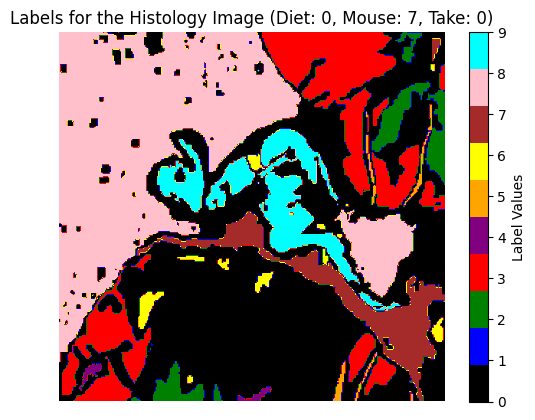

In [29]:
# Define a custom colormap for 0-9
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)

# Retrieve the labeled image from the dataset
labels_image = dataset_dict.hist_img_labels.get(key)

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Labels for the Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key (0, 7, 0).")



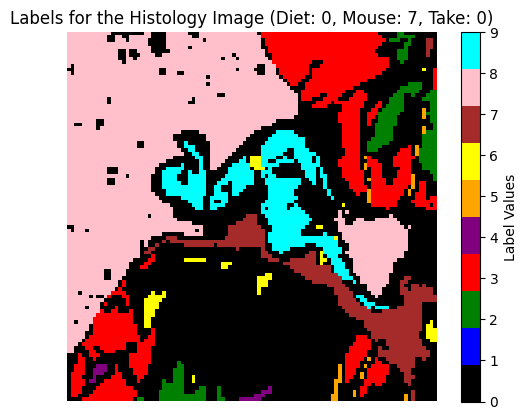

In [30]:
# Define a custom colormap for 0-9
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan']
custom_cmap = ListedColormap(colors)

# Retrieve the labeled image from the dataset
labels_image = dataset_dict.img_labels.get(key)

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap=custom_cmap)
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Labels for the Histology Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(ticks=range(10), label="Label Values")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print("No labeled image found for the specified key (0, 7, 0).")

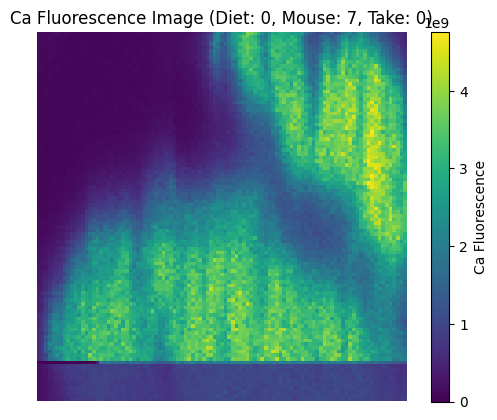

In [31]:
# Retrieve the labeled image from the dataset
labels_image = dataset_dict.images[key][:, :, 0]

if labels_image is not None:
    # Display the labeled image
    plt.imshow(labels_image, cmap='viridis')
    plt.axis('off')  # Hide axes for better visualization
    plt.title("Ca Fluorescence Image (Diet: 0, Mouse: 7, Take: 0)")
    plt.colorbar(label="Ca Fluorescence")  # Add a colorbar with ticks for 0-9
    plt.show()
else:
    print(f"No labeled image found for the specified key {key}.")